Projeto da Diciplina PROGRAMAÇÃO ESTATÍSTICA COM PYTHON   
Grupo:     
MATHEUS ANTONIO ALVES DE ARAUJO     
NATANAEL FERNANDES SARMENTO     


Os dados obtidos de Covid-19 no brasil apresenta ultima atualização na data de 30/06/2021,  esse dados foram obtidos no site url:https://brasil.io/dataset/covid19/caso_full/. Dos dados obtidos foi feito um tratamento no banco e uma filtragem por estado e região assim foi salvo um dicionario de cada estado e região apos todo o tratamento aplicado no banco, a segir vemos uma descrição das variaveis dos bancos salvos.
+ state: sigla da unidade federativa, exemplo: SP.
+ new_confirmed: número de novos casos confirmados .
+ new_deaths: número de novos óbitos.
+ date: data de coleta dos dados no formato YYYY-MM-DD.
+ order_for_place: 	Dias a partir do 1º caso de covid registrado para este local. 
+ last_available_confirmed:	Número de casos confirmados acumulados.
+ last_available_deaths: Óbitos acumulados

Para verificar as demais variaveis apresentadas no banco completo olhar a descrição no site.


A seguir vamos tratar o banco de dados agrupando por estado e região, assim calculando a incidência, mortalidade, IAD.

In [258]:
import numpy as np
import pandas as pd

url = '/content/drive/MyDrive/Colab Notebooks/PROGRAMAÇÃO ESTATÍSTICA COM PYTHON/Projeto/covid19_21_06.csv'
covid = pd.read_csv(url, index_col=1, parse_dates=True, sep=',')
covid["month"]=covid.index.strftime('%Y-%m')

state=set(covid['state'])
desc_pop=pd.DataFrame(index=state,columns=['order_for_place','estimated_population'])
for i in state:
  desc_pop.loc[i]=covid[covid['state']==i].iloc[0,[1,12]]
  a=covid[covid['state']==i].groupby(by=["month"]).sum()
  b=covid[covid['state']==i].groupby(by=["month"]).max()
  Dados[i]=pd.concat([b.loc[b.index,['last_available_confirmed','last_available_deaths']],
                     a.loc[a.index,['new_confirmed','new_deaths']]], axis=1)

regiao={'Sul':['PR','RS','SC'],'Centro-Oeste':['DF','MT','GO','MS'],
        'Norte':['AP','RR','PA','RO','AC','AM','TO'],
        'Nordeste':['PE','AL','SE','PI','CE','RN','MA','BA','PB'],
        'Sudeste':['SP','ES','RJ','MG']}
for j in regiao:
  desc_pop.loc[j]=[desc_pop.loc[regiao[j],'order_for_place'].max(),
                   desc_pop.loc[regiao[j],'estimated_population'].sum()]
  dados=covid[covid['state'].isin(regiao[j])]
  dados=dados.groupby(dados.index).sum()
  dados["month"]=dados.index.strftime('%Y-%m')
  a=dados.groupby(by=["month"]).sum()
  b=dados.groupby(by=["month"]).max()
  Dados[j]=pd.concat(
      [b.loc[b.index,['last_available_confirmed','last_available_deaths']],
      a.loc[a.index,['new_confirmed','new_deaths']]], axis=1)

dados=covid.groupby(covid.index).sum()
dados["month"]=dados.index.strftime('%Y-%m')
a=dados.groupby(by=["month"]).sum()
b=dados.groupby(by=["month"]).max()
Dados['Brasil']=pd.concat(
    [b.loc[b.index,['last_available_confirmed','last_available_deaths']],
    a.loc[a.index,['new_confirmed','new_deaths']]], axis=1)

desc_pop.loc['Brasil']=[desc_pop.loc[state,'order_for_place'].max(),
                        desc_pop.loc[state,'estimated_population'].sum()]

for cada in Dados:
  desc_pop.loc[cada,'Incidencia']=(Dados[cada].loc['2021-06','last_available_confirmed']/desc_pop.loc[cada,'estimated_population'])*100000
  desc_pop.loc[cada,'Mortalidade']=(Dados[cada].loc['2021-06','last_available_deaths']/Dados[cada].loc['2021-06','last_available_confirmed'])*100000
  desc_pop.loc[cada,'IAD']=(Dados[cada].loc['2021-06','last_available_confirmed']/desc_pop.loc[cada,'order_for_place'])
  desc_pop.loc[cada,'Casos_Confirmados']=Dados[cada].loc['2021-06','last_available_confirmed']
  desc_pop.loc[cada,'óbtos']=Dados[cada].loc['2021-06','last_available_deaths']

desc_pop=desc_pop.loc[desc_pop.index,['estimated_population','Casos_Confirmados','óbtos','Incidencia','Mortalidade','IAD','order_for_place']]
desc_pop

,estimated_population,Casos_Confirmados,óbtos,Incidencia,Mortalidade,IAD,order_for_place
CE,9187103,886757.0,22603.0,9652.193951,2548.950840,1878.722458,472
RN,3534165,343352.0,6797.0,9715.222691,1979.601109,721.327731,476
BA,14930634,1124994.0,24012.0,7534.803947,2134.411384,2334.012448,482
MS,2809394,336087.0,8231.0,11962.971374,2449.068247,709.044304,474
MG,21292666,1803748.0,46242.0,8471.217273,2563.661886,3757.808333,480
TO,1590248,198150.0,3227.0,12460.320654,1628.564219,421.595745,470
AP,861773,117188.0,1835.0,13598.476629,1565.859986,250.401709,468
SE,2318822,263512.0,5698.0,11364.046054,2162.330368,555.932489,474
PA,8690745,554681.0,15491.0,6382.433267,2792.776389,1180.172340,470
SC,7252502,1052455.0,16861.0,14511.612682,1602.063746,2211.039916,476


A seguir vamos fazer mais coisas

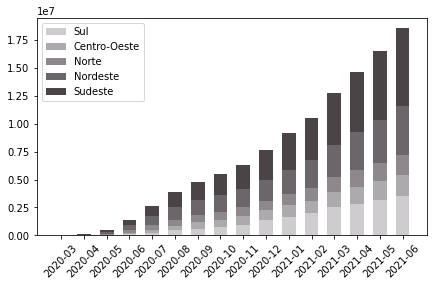

In [261]:
import matplotlib.pyplot as plt

dados_plot=pd.concat([Dados['Sul']['last_available_confirmed'],Dados['Centro-Oeste']['last_available_confirmed'],
     Dados['Norte']['last_available_confirmed'],Dados['Nordeste']['last_available_confirmed'],
     Dados['Sudeste']['last_available_confirmed']], axis=1)
dados_plot.columns=['Sul','Centro-Oeste','Norte','Nordeste','Sudeste']
dados_plot=dados_plot.loc[dados_plot.index[range(16)]]


width = 0.60  
fig, ax = plt.subplots(figsize=(7, 4))

ax.bar(dados_plot.index,dados_plot['Sul'],width, color="#CECCCE",align="center", label='Sul')
ax.bar(dados_plot.index,dados_plot['Centro-Oeste'],width,bottom=dados_plot['Sul'], color="#ADAAAD",align="center", label='Centro-Oeste')
ax.bar(dados_plot.index,dados_plot['Norte'],width, color="#8C888B",align="center", label='Norte'
,bottom=dados_plot['Sul']+dados_plot['Centro-Oeste'])
ax.bar(dados_plot.index,dados_plot['Nordeste'],width, color="#6B6669",align="center", label='Nordeste'
,bottom=dados_plot['Sul']+dados_plot['Centro-Oeste']+dados_plot['Norte'])
ax.bar(dados_plot.index,dados_plot['Sudeste'],width, color="#4A4446",align="center", label='Sudeste'
,bottom=dados_plot['Sul']+dados_plot['Centro-Oeste']+dados_plot['Norte']+dados_plot['Nordeste'])
#ax.set_ylabel("Scores")
#ax.set_title("Scores by group and gender")
#ax.set_xticks(range(17))
ax.set_xticklabels(dados_plot.index,rotation=45)
ax.legend()

